In [29]:
# code from gfg data science and machine learning course 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
#loding Data 
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info

<bound method DataFrame.info of         x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [7]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [10]:
#data processing
data = data.dropna()
print("shape of the data: ", data.shape)

shape of the data:  (699, 2)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [14]:
#splitting data
#training input and output data
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)
#validation data set
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.x[500:699]).reshape(199,1)

In [20]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_output.shape}")
print(f"test input data shape = {test_input.shape}")
print(f"test output data shape = {test_output.shape}")

training input data shape = (500, 1)
training output data shape = (500, 1)
test input data shape = (199, 1)
test output data shape = (199, 1)


# Linear Regression

In [33]:
#forward propagation
# f(x) = mx +c
def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m, train_input) +c
    
    return predictions

In [34]:
# Cost function
# summation(1/2n * (y-f(x))^2)
def cost_function(predictions, train_output):
    
    cost = np.mean((train_output - predictions) ** 2)*0.5
    
    return  cost

In [35]:
# gradient  descent for back propagation
#  df(x) = f(x) -y
#  dm = df * x
#  dc = df * 1
def backward_propagation(train_input,train_output, predictions):
    
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives

In [36]:
#update parameterss
# m = m - (learning_rate * dm)
# c = c - (learing_rate * dc)
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives['dm']
    parameters["c"] = parameters["c"] - learning_rate * derivatives['dc']
    
    return parameters

In [49]:
# model training
def train(train_input, train_output, learning_rate, iters):
    
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iteration
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost
        cost = cost_function(predictions, train_output)\
        
        loss.append(cost)
        print(f"iterations = {i+1}, Loss = {cost}")
        
        #plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, "+",label = "original")
        ax.plot(train_input, predictions, "*",label = "training")
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, "+",label = "original")
        plt.plot(train_input, predictions, "*",label = "training")
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update the parameters
        parameters = update_parameters(parameters,derivatives, learning_rate)
    
    return parameters,loss

iterations = 1, Loss = 3112.66278322736


<Figure size 640x480 with 0 Axes>

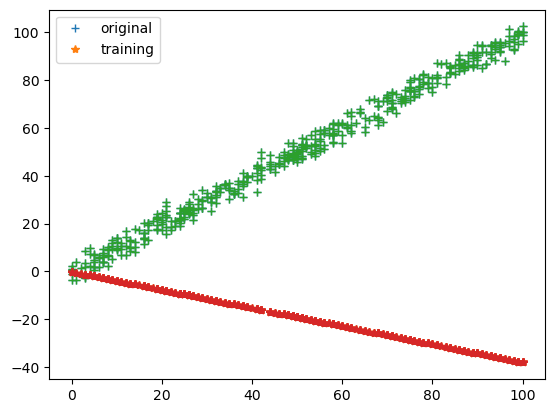

iterations = 2, Loss = 1414.354947927576


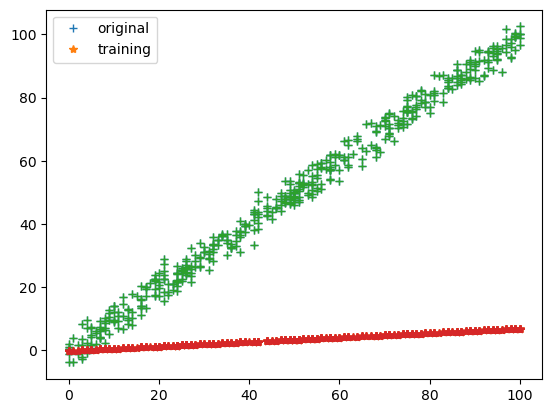

iterations = 3, Loss = 643.83080192775


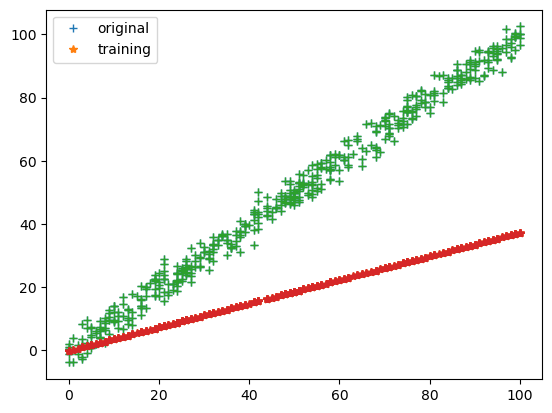

iterations = 4, Loss = 294.24314341476736


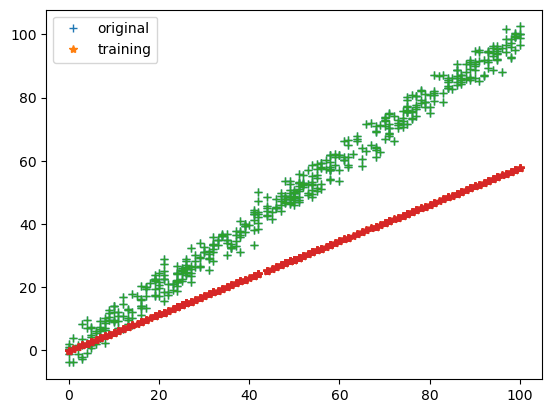

iterations = 5, Loss = 135.63483552116796


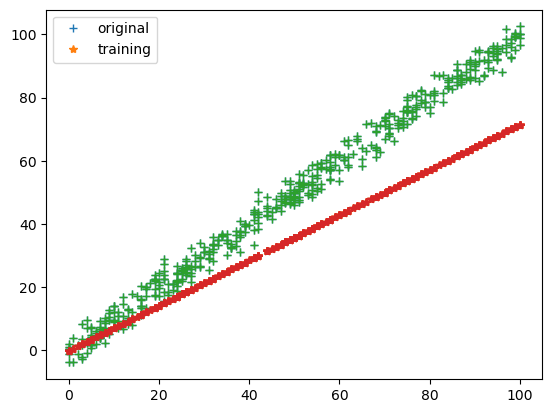

iterations = 6, Loss = 63.674070540183116


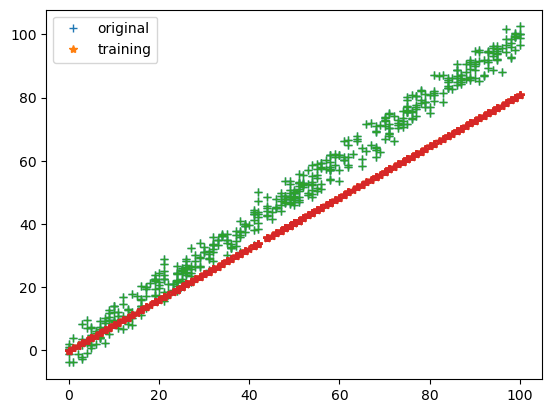

iterations = 7, Loss = 31.025391753041458


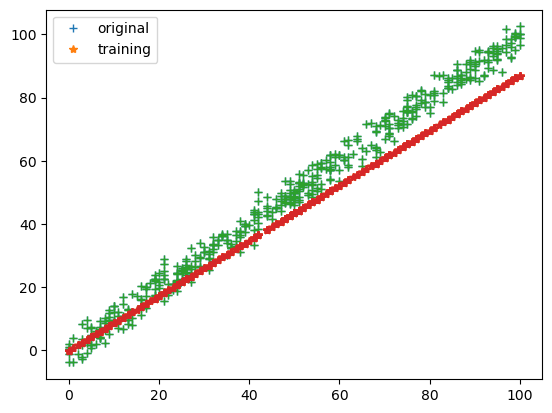

iterations = 8, Loss = 16.212650015733786


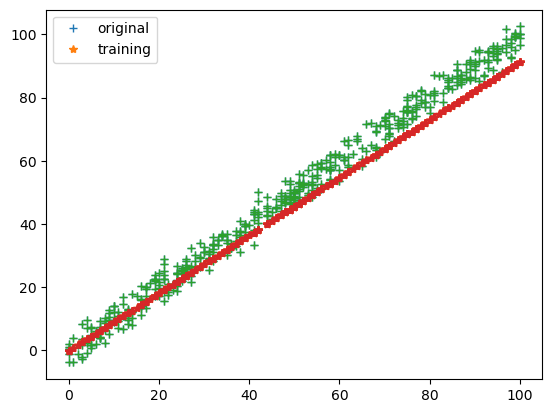

iterations = 9, Loss = 9.49209267375521


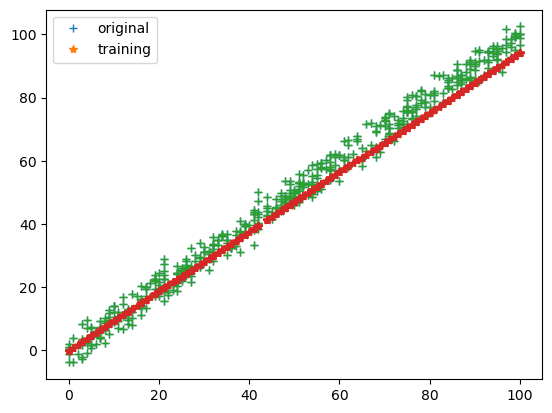

iterations = 10, Loss = 6.442968355174797


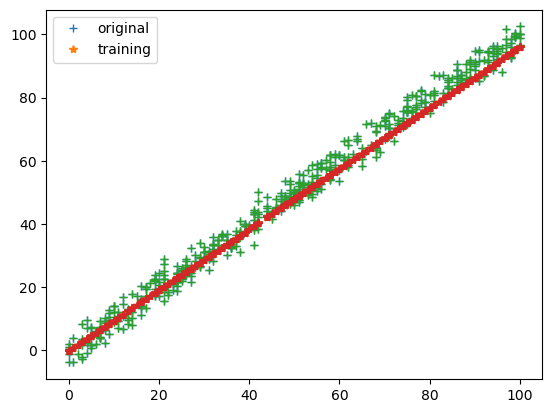

iterations = 11, Loss = 5.0595772659411065


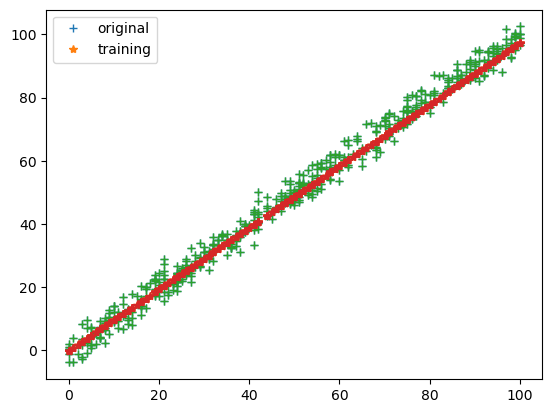

iterations = 12, Loss = 4.431931187897237


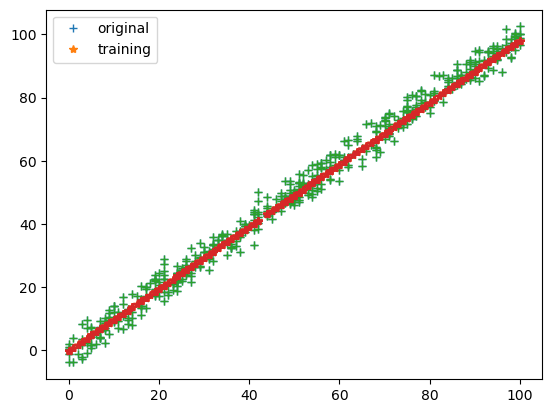

iterations = 13, Loss = 4.14716745852494


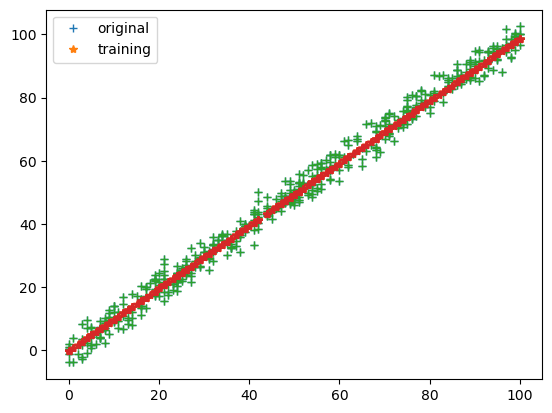

iterations = 14, Loss = 4.017969830535984


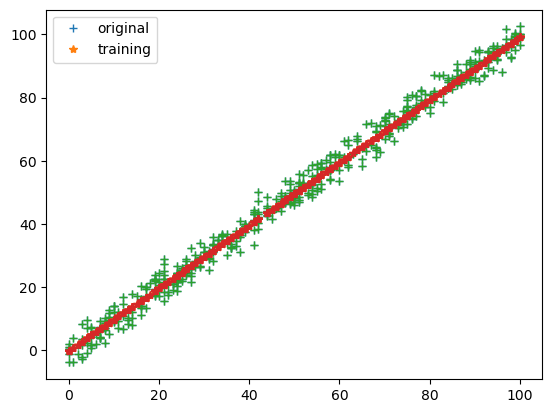

iterations = 15, Loss = 3.95935271505651


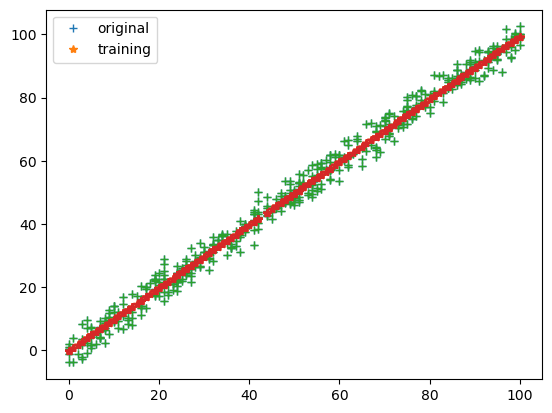

iterations = 16, Loss = 3.9327580562809


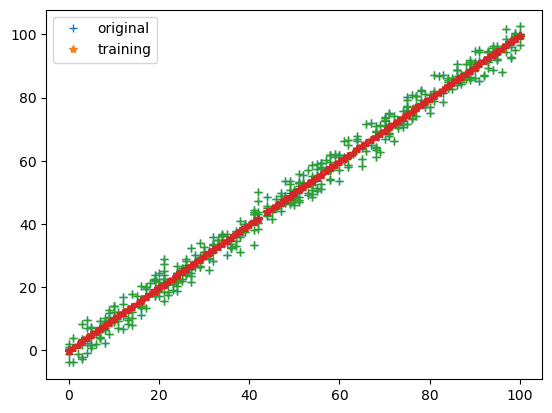

iterations = 17, Loss = 3.9206920215816603


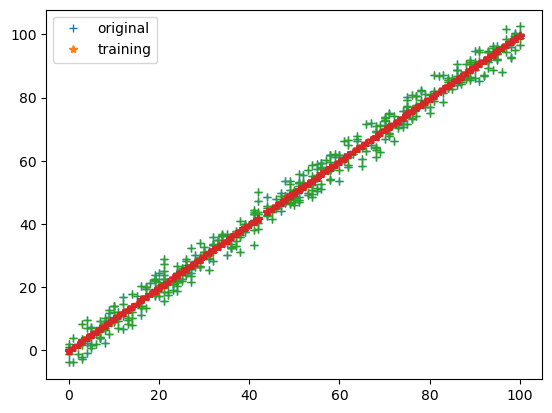

iterations = 18, Loss = 3.9152176397188017


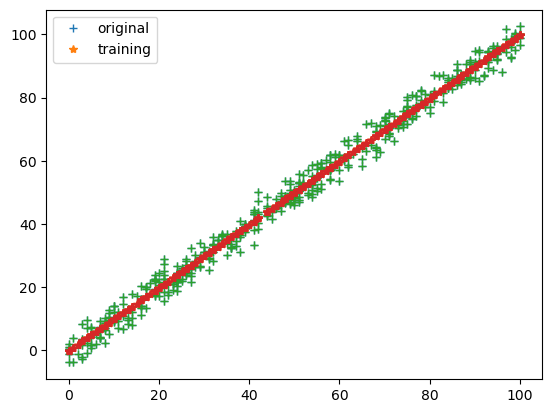

iterations = 19, Loss = 3.912733898049427


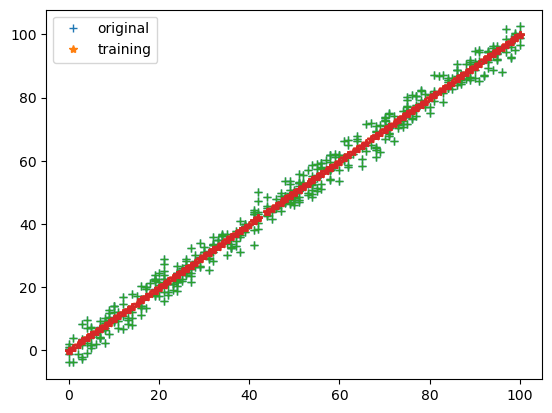

iterations = 20, Loss = 3.911607013148824


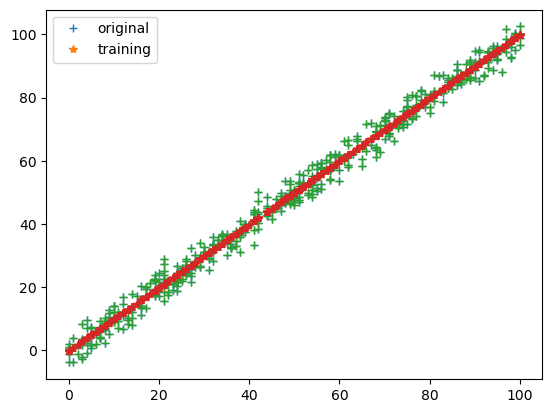

In [52]:
 # training
parameters,loss =  train(train_input,  train_output, 0.0001, 20)
    

In [54]:
print(parameters)

{'m': 0.9997371643222375, 'c': -0.1863674936114524}


In [55]:
loss

[3112.66278322736,
 1414.354947927576,
 643.83080192775,
 294.24314341476736,
 135.63483552116796,
 63.674070540183116,
 31.025391753041458,
 16.212650015733786,
 9.49209267375521,
 6.442968355174797,
 5.0595772659411065,
 4.431931187897237,
 4.14716745852494,
 4.017969830535984,
 3.95935271505651,
 3.9327580562809,
 3.9206920215816603,
 3.9152176397188017,
 3.912733898049427,
 3.911607013148824]

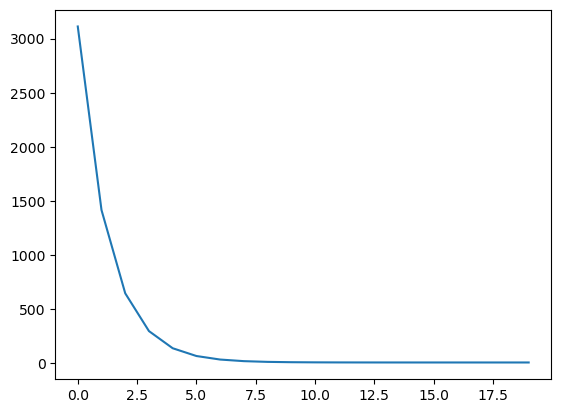

In [56]:
plt.plot(loss)

# lets predict

In [57]:
test_predictions = test_input * parameters['m'] + parameters['c']

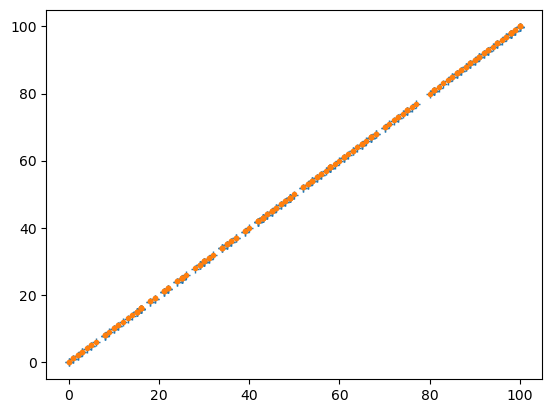

In [61]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, ".")
plt.show()

In [62]:
# cost of prediction
cost_function(test_output, test_predictions)

0.020012534168045226